
# Ensemble Learning: Bagging and Boosting

Ensemble learning is a technique that combines multiple models (often called "weak learners") to build a stronger, more accurate model. Instead of relying on a single algorithm, ensemble methods aggregate the predictions of many models to improve performance and robustness.

In this notebook, we will explore **Bagging** and **Boosting**, two of the most popular ensemble methods. We’ll also apply them to **real datasets** for both **classification** and **regression** tasks, and compare their performance.



## Bagging vs Boosting (Conceptual Explanation)

**Bagging (Bootstrap Aggregating):**
- Trains multiple models independently in parallel.
- Each model is trained on a random sample of the dataset with replacement (bootstrapping).
- Final prediction is made by majority voting (classification) or averaging (regression).
- Helps to reduce variance and avoid overfitting.
- Example: **Random Forest**.

**Boosting:**
- Trains models sequentially, where each new model tries to fix the errors of the previous one.
- Focuses more on difficult-to-predict samples by assigning them higher weights.
- Combines weak learners (often decision trees) into a strong model.
- Helps reduce both bias and variance.
- Examples: **AdaBoost, Gradient Boosting, XGBoost**.



# Bagging

## Random Forest

**Theory:**
- Random Forest is an ensemble of decision trees built using the Bagging technique.
- Each tree is trained on a random subset of data with replacement (bootstrapping).
- At each split, only a random subset of features is considered (feature randomness).
- Final prediction is made by majority vote (classification) or averaging (regression).
- Advantages:
  - Handles high dimensional data well.
  - Reduces overfitting compared to single decision trees.
  - Robust and easy to use.


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Accuracy
rf_clf_acc = accuracy_score(y_test, y_pred)
print("Random Forest Classification Accuracy:", rf_clf_acc)


Random Forest Classification Accuracy: 1.0


In [ ]:

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

# Evaluation
rf_reg_rmse = mean_squared_error(y_test, y_pred)
rf_reg_r2 = r2_score(y_test, y_pred)

print("Random Forest Regression RMSE:", rf_reg_rmse)
print("Random Forest Regression R²:", rf_reg_r2)


Random Forest Regression RMSE: 0.25650512920799395
Random Forest Regression R²: 0.8045734925119942



# Boosting

## AdaBoost

**Theory:**
- AdaBoost (Adaptive Boosting) combines multiple weak learners (usually shallow decision trees).
- Each new learner focuses more on the misclassified points from the previous learners.
- Assigns weights to each observation and updates them after every iteration.
- Final model is a weighted combination of all weak learners.
- Works best with simple models that have high bias but low variance.


![](https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Load wine dataset for classification (reload to ensure we have discrete classes)
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

# Accuracy
ada_clf_acc = accuracy_score(y_test, y_pred)
print("AdaBoost Classification Accuracy:", ada_clf_acc)

AdaBoost Classification Accuracy: 0.9814814814814815


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Train AdaBoost Regressor
ada_reg = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_reg.fit(X_train, y_train)
y_pred = ada_reg.predict(X_test)

# Evaluation
ada_reg_rmse = mean_squared_error(y_test, y_pred)
ada_reg_r2 = r2_score(y_test, y_pred)

print("AdaBoost Regression RMSE:", ada_reg_rmse)
print("AdaBoost Regression R²:", ada_reg_r2)


AdaBoost Regression RMSE: 0.0
AdaBoost Regression R²: 1.0



## Gradient Boosting

**Theory:**
- Builds models sequentially, where each new model predicts the residual errors of the previous one.
- Uses gradient descent to minimize the loss function.
- Can optimize for different loss functions (squared error, logistic loss, etc.).
- Stronger than AdaBoost in handling complex data but more prone to overfitting if not tuned properly.


![](https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

# Accuracy
gb_clf_acc = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classification Accuracy:", gb_clf_acc)


Gradient Boosting Classification Accuracy: 0.9074074074074074


In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)

# Evaluation
gb_reg_rmse = mean_squared_error(y_test, y_pred)
gb_reg_r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regression RMSE:", gb_reg_rmse)
print("Gradient Boosting Regression R²:", gb_reg_r2)


Gradient Boosting Regression RMSE: 0.11559078834181642
Gradient Boosting Regression R²: 0.8081600803615614



## XGBoost

**Theory:**
- XGBoost (Extreme Gradient Boosting) is an optimized implementation of Gradient Boosting.
- Uses advanced regularization (L1 and L2) to reduce overfitting.
- Highly efficient and scalable for large datasets.
- Supports parallel processing and missing value handling.
- One of the most popular algorithms in Kaggle competitions.


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

# Accuracy
xgb_clf_acc = accuracy_score(y_test, y_pred)
print("XGBoost Classification Accuracy:", xgb_clf_acc)

XGBoost Classification Accuracy: 0.9629629629629629


In [ ]:

from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

# Evaluation
xgb_reg_rmse = mean_squared_error(y_test, y_pred)
xgb_reg_r2 = r2_score(y_test, y_pred)

print("XGBoost Regression RMSE:", xgb_reg_rmse)
print("XGBoost Regression R²:", xgb_reg_r2)


XGBoost Regression RMSE: 0.14837633073329926
XGBoost Regression R²: 0.7537477016448975



# Model Performance Comparison


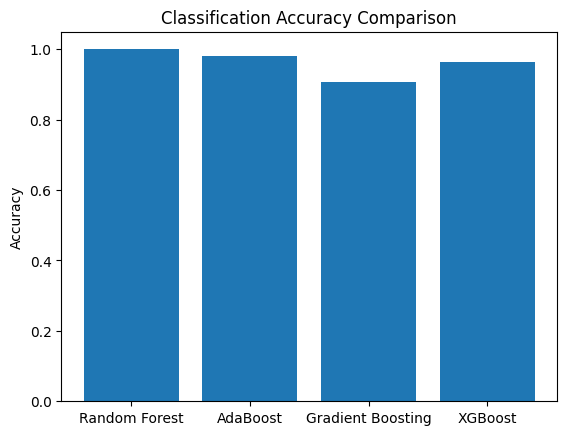

In [ ]:

import matplotlib.pyplot as plt

# Classification results
classifiers = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
acc_scores = [rf_clf_acc, ada_clf_acc, gb_clf_acc, xgb_clf_acc]

plt.bar(classifiers, acc_scores)
plt.ylabel("Accuracy")
plt.title("Classification Accuracy Comparison")
plt.show()


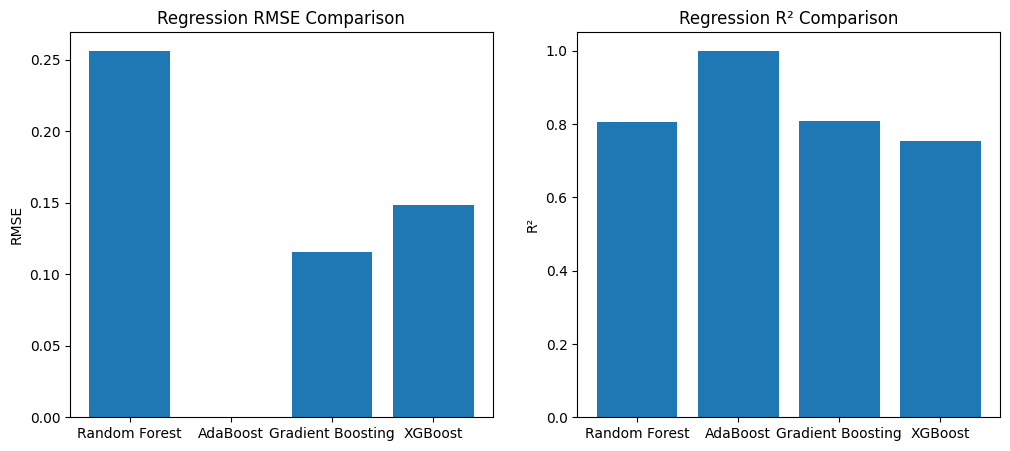

In [ ]:

# Regression results
regressors = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
rmse_scores = [rf_reg_rmse, ada_reg_rmse, gb_reg_rmse, xgb_reg_rmse]
r2_scores = [rf_reg_r2, ada_reg_r2, gb_reg_r2, xgb_reg_r2]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RMSE comparison
ax[0].bar(regressors, rmse_scores)
ax[0].set_ylabel("RMSE")
ax[0].set_title("Regression RMSE Comparison")

# R² comparison
ax[1].bar(regressors, r2_scores)
ax[1].set_ylabel("R²")
ax[1].set_title("Regression R² Comparison")

plt.show()



# Conclusion

- **Bagging (Random Forest)** works well when the main issue is high variance.
- **Boosting methods (AdaBoost, Gradient Boosting, XGBoost)** improve performance by reducing both bias and variance.
- Among boosting techniques, **XGBoost** is generally the most powerful due to its efficiency and regularization features.
- No single method is best for all problems — performance depends on dataset complexity, noise, and hyperparameter tuning.
